<a href="https://colab.research.google.com/github/pedro-varela1/Trabalho-Controle-de-Tanque-com-RootLocus/blob/main/controle_trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRUPO

###DOUGLAS WILIAN LIMA SILVA
###GUTEMBERGUE FERREIRA DA SILVA
###JEFFET MATHEUS CARDOSO DA SILVA
###PEDRO ARTUR FERNANDES VARELA DE LIRA
###ROGER JOSÉ ZACARIAS DA CONCEIÇÃO

#PROBLEMA

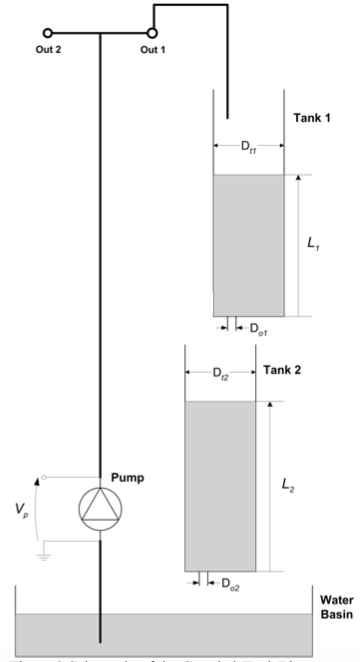

## Tanque 1

### Modelagem

A variação do volume do tanque depende da variação da vazão: vazão de entrada $Q_i$ subtraída da vazão de saída $Q_o$:

$\frac{dV}{dt} = Q_i-Q_o$

Sabemos que o volume desse tanque é definido como o produto da área da secção transversal $A$, constante, pela altura da coluna de água $h_1$, que, nesse caso, está variando com o tempo:

$\frac{dh_1}{dt} = \frac{Q_i-Q_o}{A}$

A vazão de saída é definida como sendo o produto da área da secção transversal do orifício de saída $a$ pela velocidade de saída da água $v_o$. Observamos que, com a velocidade inicial nula, podemos utilizar a Equação de Torricelli para encontrar essa $v_o$: $v_0 = \sqrt{2gh_1}$, com $g$ sendo a aceleração da gravidade.

Portanto, obtemos:

$\frac{dh_1}{dt} = \frac{Q_i-a\sqrt{2gh_1}}{A}$

A bomba introduz uma vazão de entrada ao tanque, porém, não regulamos essa vazão, mas sim, a tensão da bomba. Assim, é necessário descrever a relação entre a tensão aplicada na bomba e a vazão que ela introduz: $Q_i = V_p \cdot K_p$, onde $K_p$ é a constante de fluxo da bomba.

Com isso, temos agora:

$\frac{dh_1}{dt} = \frac{K_pV_p-a\sqrt{2gh_1}}{A}$

Ainda temos que descrever as áreas $A$ e $a$ baseado no diâmetro interno do tanque e do orifício de saída, que foi a informação dada nas instruções. Como eles têm uma configuração cilíndrica, a secção transversal consiste em um círculo: $A = \pi \frac{D_{t1}^2}{4}$ e $a = \pi \frac{D_{o1}^2}{4}$, onde $D_{t1}$ e $D_{o1}$ são, respectivamente, o diâmetro interno do tanque 1 e o diâmetro do orifício de saída.

Por fim, considerando $h_1=L_1$, como descrito no problema, temos a equação final da modelagem:

$\frac{dL_1}{dt} = \frac{K_pV_p - \pi \frac{D_{o1}^2}{4} \sqrt{2gh_1}}{\pi \frac{D_{t1}^2}{4}}$

$\frac{dL_1}{dt} = \frac{4K_pV_p - \pi D_{o1}^2 \sqrt{2gh_1}}{\pi D_{t1}^2} \implies \dot{L_1} = \frac{4K_pV_p - \pi D_{o1}^2 \sqrt{2gL_1}}{\pi D_{t1}^2} $

### Linearização

Como temos uma função $f(L_1, V_p)$, podemos linearizar através das relações:

$\dot{x} = \dot{L_1} - \dot{L_{10}}$

$x = L_1 - L_{10}$

$V = V_p - V_{p0}$

Em que as variáveis de índice 0, indicam o ponto de operação utilizado na linearização. Assim, podemos dizer que:

$\dot{L_1} - \dot{L_{10}} = (L_1 - L_{10})\dfrac{\partial{f(L_1, V_p)}}{\partial{L_1}}\mid_{L_1 = L_{10\,,V_p = V_{p0}}} + (V_p - V_{p0})\dfrac{\partial{f(L_1, V_p)}}{\partial{V_p}}\left |_{L_1 = L_{10\,,V_p = V_{p0}}}\right.$

De forma geral, temos:

$\dot{L_1} = L_1\dfrac{\partial{f(L_1, V_p)}}{\partial{L_1}}\mid_{L_1 = L_{10\,,V_p = V_{p0}}} + V_p\dfrac{\partial{f(L_1, V_p)}}{\partial{V_p}}\mid_{L_1 = L_{10\,,V_p = V_{p0}}}$

$\dot{L_1} = L_1\dfrac{- D_{o1}^2\sqrt{(2gL_1)}}{2D_{t1}^2L_1}\mid_{L_1 = L_{10\,,V_p = V_{p0}}} + V_p\dfrac{4K_p}{\pi D_{t1}^2}\mid_{L_1 = L_{10\,,V_p = V_{p0}}} $

---
Considerando $\dot{L}_{1} = 0$ e $L_{10} = 15\,cm$, conseguimos obter o ponto $V_p$:

$\dot{L_1} = \frac{4K_pV_p - \pi D_{o1}^2 \sqrt{2gL_1}}{\pi D_{t1}^2} \implies 0 = 4K_pV_p - \pi D_{o1}^2 \sqrt{2gL_1}$

$\dfrac{\pi D_{o1}^2 \sqrt{2gL_1}}{4K_p} = V_p \implies V_p = \dfrac{3.1415\cdot 0,3175^2 \sqrt{2\cdot 981\cdot 15}}{4\cdot 3,3}$

$V_p = 4,116 \,\,V$

$\dot{L_1} = L_1 \cdot (-0,02917) + V_p \cdot (0,212657)$

$\dot{L_1} = L_1  \cdot (-0,02917) + V_p \cdot (0,212657)$

$\dot{L_1} = -0,02917L_1 + 0,212657V_p$

$\dot{L_1}(t) = -0,02917L_1(t) + 0,212657V_p(t)$

---
Assim, aplicando a Transformada de Laplace e aproximando pela reta que passa pela origem, temos a seguinte expressão:

$L_1(s)\cdot s = -0,02917L_1(s) + 0,212657 V_p(s)$

$G_{p1}(s) = \dfrac{0,212657}{s + 0,02917}$



Obtendo a função de transferência do sistema, podemos encontrar os parâmetros que desejamos corrigir com o controlador.

Como queremos erro de regime nulo, precisamos descobrir, o valor do erro para a planta.

$
    e_r(\infty) = \lim_{s \rightarrow 0} s \dfrac{15}{s}\dfrac{1}{1+G_p(s)} \implies e_r(\infty) = \dfrac{15}{1+7,29} \implies e_r(\infty) = 1,809
$

Tempo de estabilização:

$ G_{p1} = \dfrac{7.29026}{34,2817s + 1} \implies \tau = 34,2817$

###CONTROLADOR PI

$G_c(s) = \dfrac{K_p(s + \frac{1}{\tau_i})}{s}$

Para cancelar o polo é necessário que:

$\dfrac{1}{\tau_i} = 0,02917 \implies \tau_i = 34,2818$

Para dimensionar o ganho proporcional Kp, utilizamos a condição de magnitude. Assim, é necessário encontrar a parte real desejada para o projeto do controlador no lugar das raízes.

$ T_{s2\%} = \dfrac{4}{Re\{P\}} = 5 \implies Re\{P\} = \dfrac{4}{5}$

Logo, temos que:

$\dfrac{K_p(s + \frac{1}{34,2818})}{s} \cdot \dfrac{0,212657}{s + 0,02917} \implies  \dfrac{K_p\cdot A_z}{A_{p0}} \cdot \dfrac{0,212657}{A_{p1}} = 1$

$K_p = \dfrac{A_{p0}A_{p1}}{0,212657 \cdot A_z}$

 Como $A_{p1} = A_z$, simplifica-se a expressão, obtendo:
 \begin{align*}
     K_p = \dfrac{0,8}{0,212657} \implies K_p = 3,762
 \end{align*}

 Com isso, a definição final o controlador proporcional integrativo é dada por:
 \begin{align*}
     G_c(s) = \dfrac{3,762(s + \frac{1}{34,2818})}{s}
 \end{align*}

In [ ]:
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ctl

def plot_response(numGpd=[0.212657], denGpd=[1, 0.02917], numGc=[8], denGc=[1], T_sim=20, REFERENCE=15, vertical_line=5):
  # Modelo da planta
  sysGpd = ctl.tf(numGpd, denGpd)
  print('Gp = ', sysGpd)

  # Modelo da realimentação unitária
  sysR = ctl.tf([1], [1])

  # Modelo do controlador
  sysGc = ctl.tf(numGc, denGc)

  # Feedback sem o controlador
  sysFBs = ctl.feedback(sysGpd, sysR)
  print('G_malhaFechada_semGp = ', sysFBs)

  # Malha Fechada antes do feedback com o controlador
  sysMFc = ctl.series(sysGc, sysGpd)

  # Feedback com o controlador
  sysFBc = ctl.feedback(sysMFc, sysR, sign=-1)
  print('G_MalhaFechada_comGp = ', sysFBc)

  tx = np.linspace(0, T_sim, 1000)  # Pontos da simulação
  u = REFERENCE * np.ones_like(tx)  # Referencia constante de 15cm

  ### Plotagem da resposta à entrada de tensão sem realimentação
  t, h = ctl.forced_response(sysGpd, tx, u)

  ## Destacar o ponto máximo para análise overshoot
  indice_ponto_maximo = np.argmax(h)
  x_ponto_maximo = t[indice_ponto_maximo]
  y_ponto_maximo = h[indice_ponto_maximo]

  # Destaque o ponto máximo com um marcador
  plt.scatter(x_ponto_maximo, y_ponto_maximo, color='indianred',
              label=f'Ponto máximo sem realimentação: h = {y_ponto_maximo:.2f} cm')
  plt.plot(t, h, color='black', linestyle='-.', label='Sem realimentação')

  ### Plotagem da resposta à entrada de tensão com a realimentação e sem o controlador
  t, h = ctl.forced_response(sysFBs, tx, u)

  ## Destacar o ponto máximo para análise overshoot
  indice_ponto_maximo = np.argmax(h)
  x_ponto_maximo = t[indice_ponto_maximo]
  y_ponto_maximo = h[indice_ponto_maximo]

  # Destaque o ponto máximo com um marcador
  plt.scatter(x_ponto_maximo, y_ponto_maximo, color='red',
              label=f'Ponto máximo sem controlador e com realimentação: h = {y_ponto_maximo:.2f} cm')
  plt.plot(t, h, color='black', linestyle='dotted', label='Com realimentação e sem controlador')

  ### Plotagem da resposta à entrada de tensão com o controlador
  t, h = ctl.forced_response(sysFBc, tx, u)
  ex = t
  ey = ((REFERENCE * np.ones_like(h)) - h)

  ## Destacar o ponto máximo para análise overshoot
  indice_ponto_maximo = np.argmax(h)
  x_ponto_maximo = t[indice_ponto_maximo]
  y_ponto_maximo = h[indice_ponto_maximo]

  # Destaque o ponto máximo com um marcador
  plt.scatter(x_ponto_maximo, y_ponto_maximo, color='darkred',
              label=f'Ponto máximo com controlador: h = {y_ponto_maximo:.2f} cm')
  plt.plot(t, h, color='black', label=f'Com o controlador: Gc = {numGc}/{denGc}')

  #### Eixos do gráfico
  plt.xlabel('t (segundos)')
  plt.ylabel('h (centímetros)')
  plt.title(f'Resposta à referência de {REFERENCE}cm')

  #### Linha vertical para análise do tempo de estabilização
  plt.axvline(x=vertical_line, color='red', linestyle='--')

  #### Definir o valor de h onde se deseja a linha horizontal - Estabilização
  ESTAB_MAX = 15.3
  ESTAB_MIN = 14.7
  ESTAB = 15
  plt.axhline(y=14.7, color='red', linestyle='--', lw=0.5)
  plt.axhline(y=15.3, color='red', linestyle='--', lw=0.5)
  plt.annotate(f'h = {ESTAB}cm', (0, ESTAB), (T_sim+7, ESTAB),
               color='red', fontsize=8, ha='center')

  #### Plotagem do gráfico
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.grid(linewidth=1)
  plt.savefig('Resposta_a_referencia.png')
  plt.show()

  return ctl.forced_response(sysGc, ex, ey)

### Para plotagem da tensão
def see_ddp(t, v):
  plt.plot(t, v, color='black')

  plt.xlabel('t (segundos)')
  plt.ylabel('Tensão (V)')
  plt.title('Entrada de Tensão na Planta (Entre Gc e Gp)')

  plt.axhline(y=12, color='red', linestyle='--')
  plt.annotate(f'V = 12 V', (0, 12), (22.7, 12),
              color='red', fontsize=8, ha='center')
  plt.grid(linewidth=1)

  plt.savefig('entrada_tensao.png')
  plt.show()

Coloque os coeficientes do numerador de Gc: 3.762 0.10974
Coloque os coeficientes do denominador de Gc: 1 0
Gp =  
  0.2127
-----------
s + 0.02917

G_malhaFechada_semGp =  
  0.2127
----------
s + 0.2418

G_MalhaFechada_comGp =  
    0.8 s + 0.02334
------------------------
s^2 + 0.8292 s + 0.02334



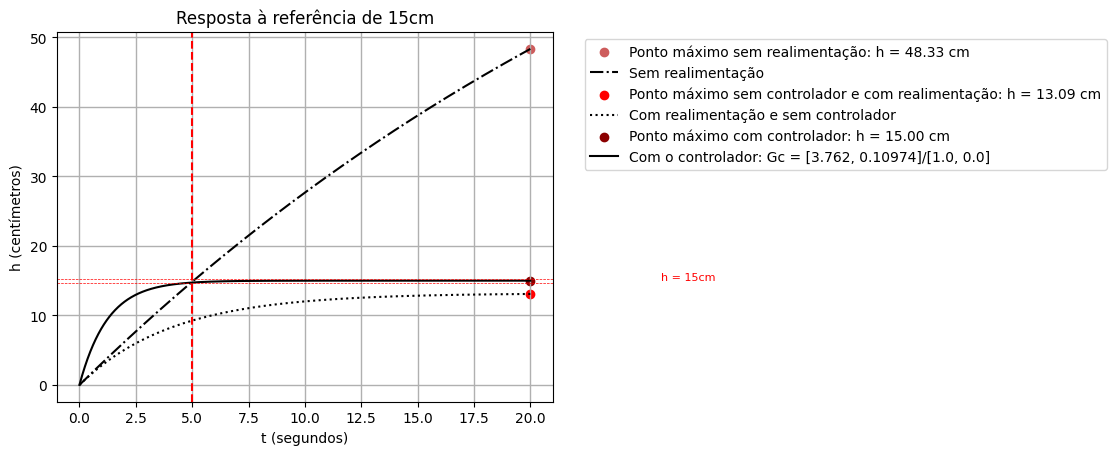

KeyboardInterrupt: ignored

In [ ]:
while True:
  numGc = [float(coeffs) for coeffs in input("Coloque os coeficientes do numerador de Gc: ").split()]
  denGc = [float(coeffs) for coeffs in input("Coloque os coeficientes do denominador de Gc: ").split()]

  t, v = plot_response(numGc=numGc, denGc=denGc)
  mudarGc = input('Deseja mudar Gc? (S/N)')
  if mudarGc.lower() == 's':
    continue
  else:
    break

see_ddp(t, v)


#### Resposta não linear

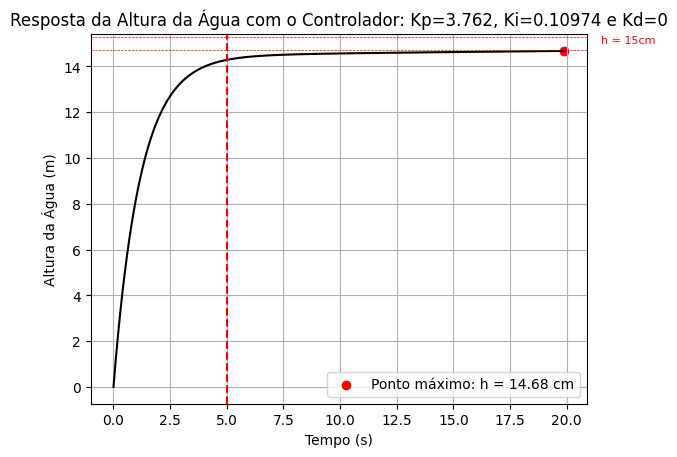

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parâmetros do sistema
Kp = 3.3
Vp=4
Do1 = 0.3175
g=981
Dt1 = 4.445

# Função que descreve a equação diferencial da planta
def plant(y, t, u):
    h = y[0]
    dhdt = ((4*Kp*u)-(np.pi * Do1*Do1*np.sqrt(2*g*h)))/(np.pi * Dt1*Dt1)
    return [dhdt]

# Parâmetros do controlador PID
# ------------------------ ALTERAR-------------------------------------
kp = 3.762
ki = 0.10974
kd = 0
# ---------------------------------------------------------------------

dt = 0.1  # Intervalo de amostragem
sim_time = 20  # Tempo total de simulação
setpoint = 15.0  # Altura desejada da água

# Inicialização
time = np.arange(0, sim_time, dt)
height = np.zeros_like(time)
prev_error = 0
integral = 0
ddp = []

# Loop de simulação
for i in range(1, len(time)):
    # Calcular o erro
    error = setpoint - height[i - 1]

    # Calcular a integral e o derivativo
    integral += error * dt
    derivative = (error - prev_error) / dt

    # Calcular o sinal de controle usando o controlador PID
    control_signal = kp * error + ki * integral + kd * derivative

    ddp.append(control_signal)
    # Integrar a equação diferencial usando odeint
    y0 = [height[i - 1]]
    y = odeint(plant, y0, [0, dt], args=(control_signal,))
    height[i] = y[-1]

    # Atualizar o erro anterior
    prev_error = error

ddp.append(control_signal)

# Plotar resultados
plt.figure()
plt.plot(time, height, color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura da Água (m)')
plt.title(f'Resposta da Altura da Água com o Controlador: Kp={kp}, Ki={ki} e Kd={kd}')

## Destacar o ponto máximo para análise overshoot
indice_ponto_maximo = np.argmax(height)
x_ponto_maximo = time[indice_ponto_maximo]
y_ponto_maximo = height[indice_ponto_maximo]

# Destaque o ponto máximo com um marcador
plt.scatter(x_ponto_maximo, y_ponto_maximo, color='red',
            label=f'Ponto máximo: h = {y_ponto_maximo:.2f} cm')

#### Linha vertical para análise do tempo de estabilização
plt.axvline(x=5, color='red', linestyle='--')

#### Definir o valor de h onde se deseja a linha horizontal - Estabilização
ESTAB_MAX = 15.3
ESTAB_MIN = 14.7
ESTAB = 15
plt.axhline(y=14.7, color='red', linestyle='--', lw=0.5)
plt.axhline(y=15.3, color='red', linestyle='--', lw=0.5)
plt.annotate(f'h = {ESTAB}cm', (0, ESTAB), (sim_time+2.7, ESTAB),
              color='red', fontsize=8, ha='center')

plt.legend()
plt.grid(True)
plt.savefig(f'Resposta da Altura da Água com o Controlador')
plt.show()


In [ ]:
# Plotar entrada de tensao
plt.figure()
plt.plot(time, ddp, color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída de tensão do controlador (V)')

plt.axhline(y=12, color='red', linestyle='--')
plt.annotate(f'V = 12 V', (0, 12), (22.7, 12),
             color='red', fontsize=8, ha='center')

plt.grid()
plt.savefig('entrada_tensao.png')
plt.title(f'Entrada de Tensão na Planta para: Kp={kp}, Ki={ki} e Kd={kd}')

#### Com o saturador

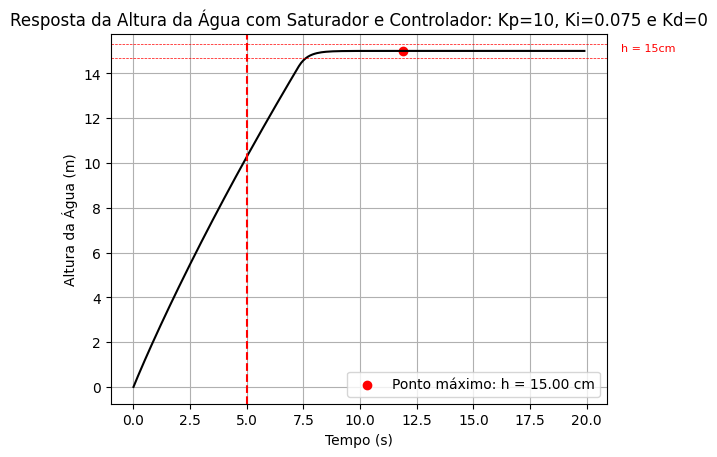

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parâmetros do sistema
Kp = 3.3
Vp=4
Do1 = 0.3175
g=981
Dt1 = 4.445

# Função que descreve a equação diferencial da planta
def plant(y, t, u):
    h = y[0]
    dhdt = ((4*Kp*u)-(np.pi * Do1*Do1*np.sqrt(2*g*h)))/(np.pi * Dt1*Dt1)
    return [dhdt]

# Parâmetros do controlador PID
# ------------------------ ALTERAR-------------------------------------
kp = 10
ki = 0.075
kd = 0
# ---------------------------------------------------------------------

limite_superior = 12.0  # Limite superior de 12 volts
limite_inferior = -12.0  # Limite inferior de -12 volts
dt = 0.1  # Intervalo de amostragem
sim_time = 20  # Tempo total de simulação
setpoint = 15.0  # Altura desejada da água

# Inicialização
time = np.arange(0, sim_time, dt)
height = np.zeros_like(time)
prev_error = 0
integral = 0
ddp = []

# Loop de simulação
for i in range(1, len(time)):
    # Calcular o erro
    error = setpoint - height[i - 1]

    # Calcular a integral e o derivativo
    integral += error * dt
    derivative = (error - prev_error) / dt

    # Calcular o sinal de controle usando o controlador PID
    control_signal = kp * error + ki * integral + kd * derivative

    # Aplique os limites ao sinal de controle
    control_signal = np.clip(control_signal, limite_inferior, limite_superior)

    ddp.append(control_signal)
    # Integrar a equação diferencial usando odeint
    y0 = [height[i - 1]]
    y = odeint(plant, y0, [0, dt], args=(control_signal,))
    height[i] = y[-1]

    # Atualizar o erro anterior
    prev_error = error

ddp.append(control_signal)

# Plotar resultados
plt.figure()
plt.plot(time, height, color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura da Água (m)')
plt.title(f'Resposta da Altura da Água com Saturador e Controlador: Kp={kp}, Ki={ki} e Kd={kd}')

## Destacar o ponto máximo para análise overshoot
indice_ponto_maximo = np.argmax(height)
x_ponto_maximo = time[indice_ponto_maximo]
y_ponto_maximo = height[indice_ponto_maximo]

# Destaque o ponto máximo com um marcador
plt.scatter(x_ponto_maximo, y_ponto_maximo, color='red',
            label=f'Ponto máximo: h = {y_ponto_maximo:.2f} cm')

#### Linha vertical para análise do tempo de estabilização
plt.axvline(x=5, color='red', linestyle='--')

#### Definir o valor de h onde se deseja a linha horizontal - Estabilização
ESTAB_MAX = 15.3
ESTAB_MIN = 14.7
ESTAB = 15
plt.axhline(y=14.7, color='red', linestyle='--', lw=0.5)
plt.axhline(y=15.3, color='red', linestyle='--', lw=0.5)
plt.annotate(f'h = {ESTAB}cm', (0, ESTAB), (sim_time+2.7, ESTAB),
              color='red', fontsize=8, ha='center')

plt.legend()
plt.grid(True)
plt.savefig(f'Resposta da Altura da Água com o Controlador')
plt.show()


Text(0.5, 1.0, 'Entrada de Tensão Saturada na Planta para: Kp=10, Ki=0.075 e Kd=0')

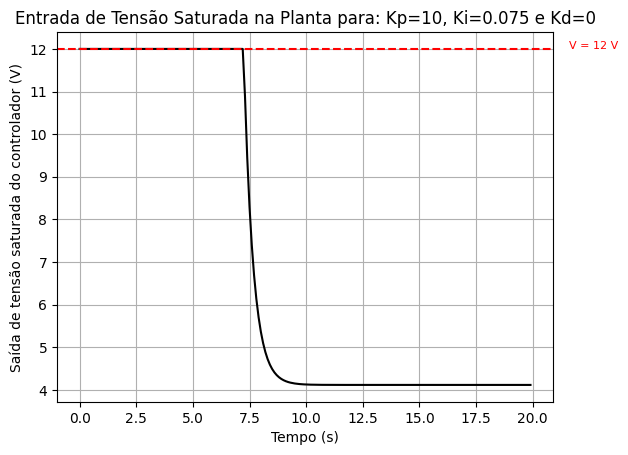

In [ ]:
# Plotar entrada de tensao
plt.figure()
plt.plot(time, ddp, color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída de tensão saturada do controlador (V)')

plt.axhline(y=12, color='red', linestyle='--')
plt.annotate(f'V = 12 V', (0, 12), (22.7, 12),
             color='red', fontsize=8, ha='center')

plt.grid()
plt.savefig('entrada_tensao.png')
plt.title(f'Entrada de Tensão Saturada na Planta para: Kp={kp}, Ki={ki} e Kd={kd}')

## Tanque 2

### Modelagem

De maneira similar ao tanque 1, chegamos à expressão abaixo, já que a vazão de saída do tanque 1 é igual à vazão de entrada do tanque 2.

$\frac{dL_2}{dt} = \frac{Q_{o1}-a\sqrt{2gL_2}}{A}$

As áreas da secção transversal também podem ser obtidas de maneira similar, ou seja, temos: $A = \pi \frac{D_{t2}^2}{4}$ e $a = \pi \frac{D_{o2}^2}{4}$, onde $D_{t2}$ e $D_{o2}$ são, respectivamente, o diâmetro interno e o diâmetro do orifício de saída do tanque 2.

Com isso:

$\frac{dL_2}{dt} = \frac{Q_{o1}- \pi \frac{D_{o2}^2}{4} \sqrt{2gL_2}}{\pi \frac{D_{t2}^2}{4}}$

$\frac{dL_2}{dt} = \frac{4Q_{o1} - \pi D_{o2}^2 \sqrt{2gL_2}}{\pi D_{t2}^2}$

Para finalizar a modelagem, podemos escrever a vazão de saída do tanque 1 ($Q_{o1}$) em função da altura no tanque 1, como fizemos na modelagem do próprio tanque 1:

$Q_{o1} = \pi \frac{D_{o1}^2}{4} \sqrt{2gL_1}$

Chegamos a seguinte expressão final:

$\frac{dL_2}{dt} = \frac{\pi D_{o1}^2 \sqrt{2gL_1} - \pi D_{o2}^2 \sqrt{2gL_2}}{\pi D_{t2}^2}
 \implies \dot{L_2} = \frac{D_{o1}^2 \sqrt{2gL_1} - D_{o2}^2 \sqrt{2gL_2}}{ D_{t2}^2} $

 Com essa equação, depois da linearização, podemos obter uma função de transferência que relaciona o nível de altura do tanque 2 com o nível de altura do tanque 2.

 E, com essa função de tranferência em mãos, podemos relacioná-la em série com a função de transferência obtida do tanque 1. A função de transferência resultante dessa associação em série irá expressar diretamente uma relação entre a tensão aplicada na bomba e o nível de altura da água no tanque 2.

### Linearização

Novamente, tendo a equação diferencial no tempo, podemos linearizá-la em um ponto de operação definido para obtermos a função de transferência do tanque 2.

Como temos uma função $f(L_1, L_2)$, podemos linearizar através das relações:

$\dot{x} = \dot{L}_2 - \dot{L}_{20}$

$x = L_2 - L_{20}$

$L = L_1 - L_{10}$

Em que as variáveis de índice 0, indicam o ponto de operação utilizado na linearização. Assim, podemos dizer que:

$\dot{L}_2 - \dot{L}_{20} = (L_2 - L_{20})\dfrac{\partial{f(L_1, L_2)}}{\partial{L_2}}\mid_{L_2 = L_{20\,,L_1 = L_{10}}} + (L_1 - L_{10})\dfrac{\partial{f(L_1, L_2)}}{\partial{L_1}}\mid_{L_2 = L_{20\,,L_1 = L_{10}}}$

De forma geral, temos:

$\dot{L}_2 = L_2\dfrac{\partial{f(L_1, L_2)}}{\partial{L_2}}\mid_{L_2 = L_{20\,,L_1 = L_{10}}} + L_1\dfrac{\partial{f(L_1, L_2)}}{\partial{L_1}}\mid_{L_2 = L_{20\,,L_1 = L_{10}}}$

$\dot{L}_2 = L_2\dfrac{- D_{o2}^2\sqrt{(2gL_2)}}{2D_{t2}^2L_2}\mid_{L_2 = L_{20\,,L_1 = L_{10}}} + L_1\dfrac{D_{o1}^2\sqrt{(2gL_1)}}{2D_{t2}^2L_1}\mid_{L_2 = L_{20\,,L_1 = L_{10}}} $

Usando o valor de $L_2 = 15\,\,cm$ podemos encontrar $L_1$, usando:
$L_1 = \left(\dfrac{D_{o2}^2\sqrt{2g \cdot 15}}{D_{o1}^2 \sqrt{2g}}\right)^2 \implies L_1 = 8,7142\,\, cm$

Aplicando as alturas desejadas de 15cm e os diâmetros adequados, temos:

$\dot{L}_2(t) = -0,0656448L_2(t) + 0,0382780L_1(t)$

Aplicando Laplace, temos:

$(s + 0,0656448)L_2(s)= 0,0382780L_1(s)$

$G_{p2} = \dfrac{0,0382780}{s+0,0656448}$

Para a função de transferência se mantenha em relação à tensão da bomba e como temos um sistema de FTs em série, iremos multiplicar $G_{p1}$ por $G_{p2}$ encontrando a função de transferência do segundo tanque.

$G_{p1}\cdot G_{p2} = \dfrac{0,212657}{s + 0,02917} \cdot \dfrac{0,0382780}{s+0,0656448}$

$G_{pt} = \dfrac{0,00814}{s^2 + 0,0948148s + 0,0019148} \implies G_{pt} = \dfrac{0,00814}{(s+0,0656464)(s+0,0291684)}$

O erro de regime para o sistema ao ser aplicado um degrau de valor 15 será dado por:

$ e_r(\infty) = \lim_{s \rightarrow 0} s \dfrac{15}{s}\dfrac{1}{1+G_{pt}(s)} \implies e_r(\infty) = \dfrac{15}{1+4,2511} \implies e_r(\infty) = 2,85645$

A partir da FT encontrada podemos identificar alguns parâmetros:

$\omega_n = \sqrt{(0,0019148)} \implies \omega_n = 0,043758$

$2\xiω_n = 0,0948148 \implies \xi = \dfrac{0,0948148}{2\cdot 0,043758} \implies \xi = 1,0834$

Tempo de estabilização:
$T_{s2\%} = \dfrac{4}{ξω_n} \implies T_{s2\%} = 84,375$ segundos:


###CONTROLADOR PID

O controlador PID é definido da seguinte forma:
\begin{align*}
    G_c = \dfrac{K_c\tau_d\left(s + \dfrac{1}{2\tau_d}\right)^2}{s}
\end{align*}

Sendo definido também que $\tau_i = 4\tau_d$.

Coloque os coeficientes do numerador de Gc: 226 80 8
Coloque os coeficientes do denominador de Gc: 1 0
Gp =  
         0.00814
--------------------------
s^2 + 0.09481 s + 0.001915

G_malhaFechada_semGp =  
         0.00814
-------------------------
s^2 + 0.09481 s + 0.01005

G_MalhaFechada_comGp =  
   1.84 s^2 + 0.6512 s + 0.06512
------------------------------------
s^3 + 1.934 s^2 + 0.6531 s + 0.06512



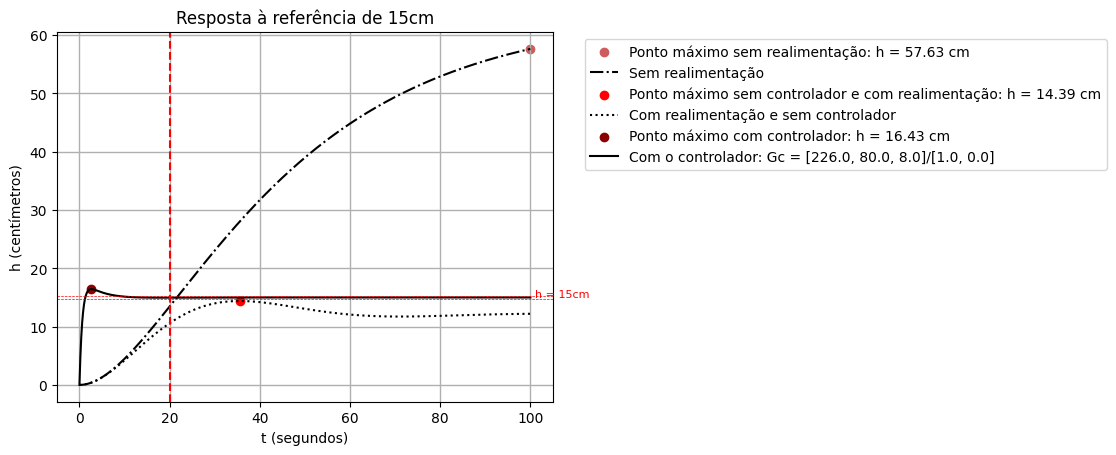

ValueError: ignored

In [ ]:
while True:
  numGc = [float(coeffs) for coeffs in input("Coloque os coeficientes do numerador de Gc: ").split()]
  denGc = [float(coeffs) for coeffs in input("Coloque os coeficientes do denominador de Gc: ").split()]

  t, v = plot_response(numGpd=[0.00814], denGpd=[1, 0.0948148, 0.0019148], numGc=numGc, denGc=denGc, vertical_line=20, T_sim=100)
  mudarGc = input('Deseja mudar Gc? (S/N)')
  if mudarGc.lower() == 's':
    continue
  else:
    break

#### Resposta não-linear



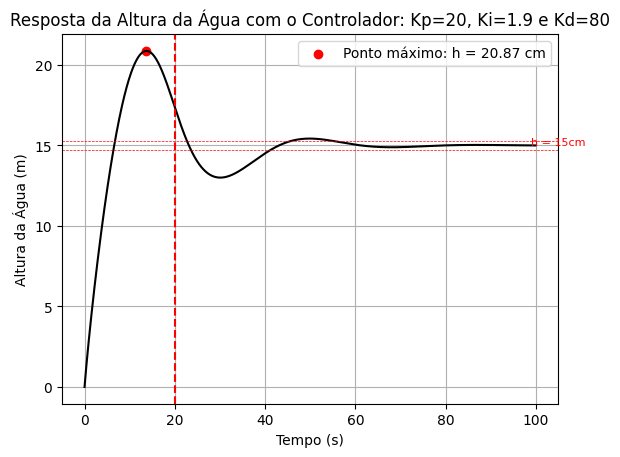

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parâmetros do sistema (Planta 1)
Kp = 3.3
Do1 = 0.3175
g=981
Dt1 = 4.445

# Parâmetros do sistema (Planta 2)
Dt2 = 4.445
Do2 = 0.47625

# Função que descreve a equação diferencial das plantas
def plant1(y, t, u):
    h = y[0]
    dhdt = ((4*Kp*u)-(np.pi * Do1*Do1*np.sqrt(2*g*h)))/(np.pi * Dt1*Dt1)
    return [dhdt]

def plant2(y, t, h1):
    h2 = y[0]
    dh2dh1 = ((Do1*Do1*np.sqrt(2*g*h1))-(Do2*Do2*np.sqrt(2*g*h2)))/(Dt2*Dt2)
    return dh2dh1


# Parâmetros do controlador PID
# ------------------------ ALTERAR-------------------------------------
kp = 20
ki = 1.9
kd = 80
# ---------------------------------------------------------------------

dt = 0.1  # Intervalo de amostragem
sim_time = 100  # Tempo total de simulação
setpoint = 15.0  # Altura desejada da água

# Inicialização
time = np.arange(0, sim_time, dt)

height_tank1 = np.zeros_like(time)
height_tank2 = np.zeros_like(time)

prev_error = 0
integral = 0
ddp = []

# Loop de simulação
for i in range(1, len(time)):
    # Calcular o erro
    error = setpoint - height_tank2[i - 1]

    # Calcular a integral e o derivativo
    integral += error * dt
    derivative = (error - prev_error) / dt

    # Calcular o sinal de controle usando o controlador PID
    control_signal = kp * error + ki * integral + kd * derivative

    ddp.append(control_signal)

    # Integrar a equação diferencial do tanque 1 usando odeint
    y0_tank1 = [height_tank1[i - 1]]
    y_tank1 = odeint(plant1, y0_tank1, [0, dt], args=(control_signal,))
    height_tank1[i] = y_tank1[-1]

    # Obter o valor da altura do tanque 1 para usar no tanque 2
    h1 = y_tank1[-1]

    # Integrar a equação diferencial do tanque 2 usando odeint e o valor de h1
    y0_tank2 = [height_tank2[i - 1]]
    y_tank2 = odeint(plant2, y0_tank2, [0, dt], args=(h1,))
    height_tank2[i] = y_tank2[-1]

    # Atualizar o erro anterior
    prev_error = error

ddp.append(control_signal)

# Plotar resultados
plt.figure()
plt.plot(time, height_tank2, color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura da Água (m)')
plt.title(f'Resposta da Altura da Água com o Controlador: Kp={kp}, Ki={ki} e Kd={kd}')

## Destacar o ponto máximo para análise overshoot
indice_ponto_maximo = np.argmax(height_tank2)
x_ponto_maximo = time[indice_ponto_maximo]
y_ponto_maximo = height_tank2[indice_ponto_maximo]

# Destaque o ponto máximo com um marcador
plt.scatter(x_ponto_maximo, y_ponto_maximo, color='red',
            label=f'Ponto máximo: h = {y_ponto_maximo:.2f} cm')

#### Linha vertical para análise do tempo de estabilização
plt.axvline(x=20, color='red', linestyle='--')

#### Definir o valor de h onde se deseja a linha horizontal - Estabilização
ESTAB_MAX = 15.3
ESTAB_MIN = 14.7
ESTAB = 15
plt.axhline(y=14.7, color='red', linestyle='--', lw=0.5)
plt.axhline(y=15.3, color='red', linestyle='--', lw=0.5)
plt.annotate(f'h = {ESTAB}cm', (0, ESTAB), (sim_time+5, ESTAB),
              color='red', fontsize=8, ha='center')

plt.legend()
plt.grid(True)
plt.savefig(f'Resposta da Altura da Água com o Controlador')
plt.show()


Text(0.5, 1.0, 'Saída de tensão do controlador para: Kp=20, Ki=1.9 e Kd=80')

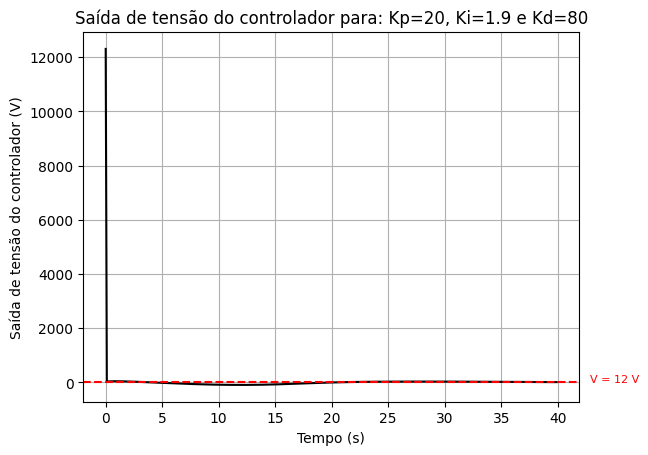

In [ ]:
# Plotar entrada de tensao
plt.figure()
plt.plot(time, ddp, color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída de tensão do controlador (V)')

plt.axhline(y=12, color='red', linestyle='--')
plt.annotate(f'V = 12 V', (0, 12), (45, 12),
             color='red', fontsize=8, ha='center')

plt.grid()
plt.savefig('entrada_tensao.png')
plt.title(f'Saída de tensão do controlador para: Kp={kp}, Ki={ki} e Kd={kd}')

#### Com saturação

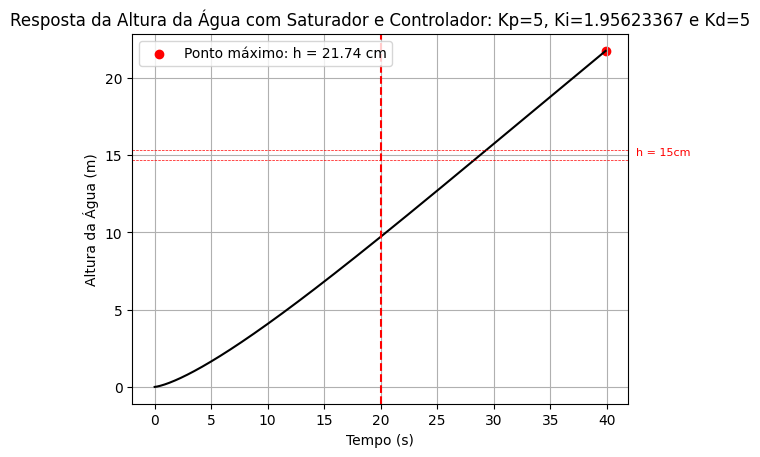

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parâmetros do sistema (Planta 1)
Kp = 3.3
Do1 = 0.3175
g=981
Dt1 = 4.445

# Parâmetros do sistema (Planta 2)
Dt2 = 4.445
Do2 = 0.3175

# Função que descreve a equação diferencial das plantas
def plant1(y, t, u):
    h = y[0]
    dhdt = ((4*Kp*u)-(np.pi * Do1*Do1*np.sqrt(2*g*h)))/(np.pi * Dt1*Dt1)
    return [dhdt]

def plant2(y, t, h1):
    h2 = y[0]
    dh2dh1 = ((Do1*Do1*np.sqrt(2*g*h1))-(Do2*Do2*np.sqrt(2*g*h2)))/(Dt2*Dt2)
    return dh2dh1


# Parâmetros do controlador PID
# ------------------------ ALTERAR-------------------------------------
kp = 5
ki = 1.95623367
kd = 5
# ---------------------------------------------------------------------

dt = 0.1  # Intervalo de amostragem
sim_time = 40  # Tempo total de simulação
setpoint = 15.0  # Altura desejada da água

# Inicialização
time = np.arange(0, sim_time, dt)

height_tank1 = np.zeros_like(time)
height_tank2 = np.zeros_like(time)

# Limites de tensão na bomba
limite_inferior=-12
limite_superior=12

prev_error = 0
integral = 0
ddp = []

# Loop de simulação
for i in range(1, len(time)):
    # Calcular o erro
    error = setpoint - height_tank2[i - 1]

    # Calcular a integral e o derivativo
    integral += error * dt
    derivative = (error - prev_error) / dt

    # Calcular o sinal de controle usando o controlador PID
    control_signal = kp * error + ki * integral + kd * derivative

    # Aplicar os limites ao sinal de controle
    control_signal = np.clip(control_signal, limite_inferior, limite_superior)

    ddp.append(control_signal)

    # Integrar a equação diferencial do tanque 1 usando odeint
    y0_tank1 = [height_tank1[i - 1]]
    y_tank1 = odeint(plant1, y0_tank1, [0, dt], args=(control_signal,))
    height_tank1[i] = y_tank1[-1]

    # Obter o valor da altura do tanque 1 para usar no tanque 2
    h1 = y_tank1[-1]
    # Aplique os limites para a altura da bomba 1
    #h1 = np.clip(h1, 0, 15)

    # Integrar a equação diferencial do tanque 2 usando odeint e o valor de h1
    y0_tank2 = [height_tank2[i - 1]]
    y_tank2 = odeint(plant2, y0_tank2, [0, dt], args=(h1,))
    height_tank2[i] = y_tank2[-1]

    # Atualizar o erro anterior
    prev_error = error

ddp.append(control_signal)

# Plotar resultados
plt.figure()
plt.plot(time, height_tank2, color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura da Água (m)')
plt.title(f'Resposta da Altura da Água com Saturador e Controlador: Kp={kp}, Ki={ki} e Kd={kd}')

## Destacar o ponto máximo para análise overshoot
indice_ponto_maximo = np.argmax(height_tank2)
x_ponto_maximo = time[indice_ponto_maximo]
y_ponto_maximo = height_tank2[indice_ponto_maximo]

# Destacar o ponto máximo com um marcador
plt.scatter(x_ponto_maximo, y_ponto_maximo, color='red',
            label=f'Ponto máximo: h = {y_ponto_maximo:.2f} cm')

#### Linha vertical para análise do tempo de estabilização
plt.axvline(x=20, color='red', linestyle='--')

#### Definir o valor de h onde se deseja a linha horizontal - Estabilização
ESTAB_MAX = 15.3
ESTAB_MIN = 14.7
ESTAB = 15
plt.axhline(y=14.7, color='red', linestyle='--', lw=0.5)
plt.axhline(y=15.3, color='red', linestyle='--', lw=0.5)
plt.annotate(f'h = {ESTAB}cm', (0, ESTAB), (sim_time+5, ESTAB),
              color='red', fontsize=8, ha='center')

plt.legend()
plt.grid(True)
plt.savefig(f'Resposta da Altura da Água com o Controlador e Saturador')
plt.show()


Text(0.5, 1.0, 'Saída de tensão do controlador saturado para: Kp=5, Ki=1.95623367 e Kd=5')

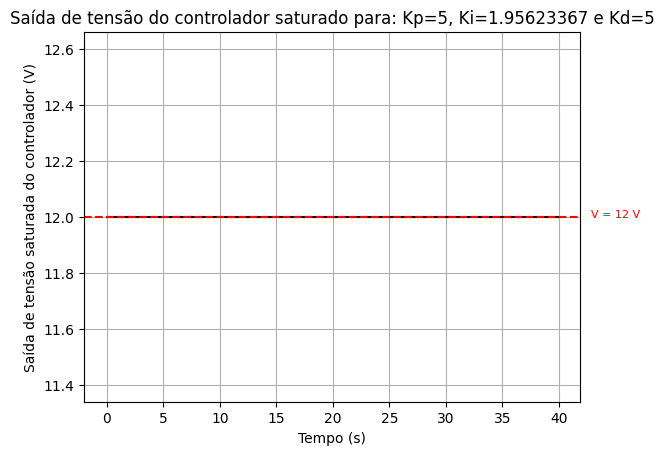

In [ ]:
# Plotar entrada de tensao
plt.figure()
plt.plot(time, ddp, color='black')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída de tensão saturada do controlador (V)')

plt.axhline(y=12, color='red', linestyle='--')
plt.annotate(f'V = 12 V', (0, 12), (45, 12),
             color='red', fontsize=8, ha='center')

plt.grid()
plt.savefig('entrada_tensao.png')
plt.title(f'Saída de tensão do controlador saturado para: Kp={kp}, Ki={ki} e Kd={kd}')

Gp =  
0.4443 z^2 + 0.1682 z + 0.0159
------------------------------
z^3 + 0.09481 z^2 + 0.001915 z

dt = 1

Gc =  
1
-
1

dt = 1

R =  
1
-
1

dt = 1



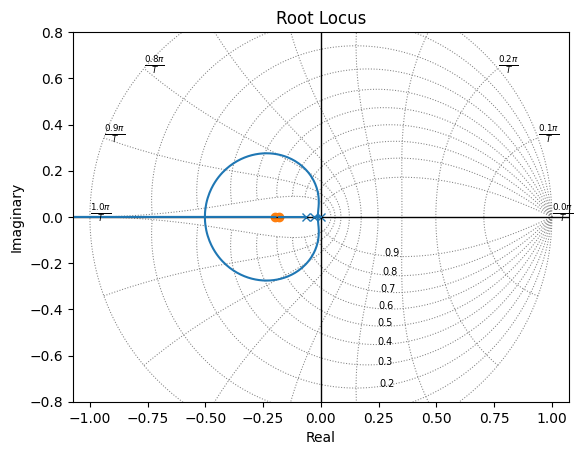

In [ ]:
!pip install control

# Importar bibliotecas necessárias
import numpy as pd
import matplotlib.pyplot as plt
import control as ctl

# Modelo da planta e taxa de amostragem
Ta = 1  # Taxa de amostragem de 1s
sysGpd = ctl.tf([0.4443, 0.168236, 0.0159], [1, 0.0948148, 0.0019148, 0], Ta)
print('Gp = ', sysGpd)

# Modelo do controlador
sysGc = ctl.tf([1], [1], Ta)
print('Gc = ', sysGc)

# Modelo da realimentação
sysR = ctl.tf([1], [1], Ta)
print('R = ', sysR)

# Bounderies of root locus
Xi_RL = -0.8
Xf_RL = 0.8
Yi_RL = -0.8
Yf_RL = 0.8

# Root locus
sysRL = ctl.series(sysGpd, sysR)
ctl.rlocus(sysGpd, plot=True)
plt.axis([Xi_RL, Xf_RL, Yi_RL, Yf_RL])
plt.title('Root Locus')
plt.savefig("Lugar das raizes.png", dpi=500)
plt.show()